In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
url = "patient.csv"
corona_data = pd.read_csv(url)

In [3]:
corona_data.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [4]:
corona_data['state'].value_counts()

isolated    7777
released      56
deceased      36
Name: state, dtype: int64

In [5]:
print(corona_data.dtypes)

patient_id            int64
sex                  object
birth_year          float64
country              object
region               object
disease             float64
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object


In [6]:
corona_data.tail()


,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7868,7869,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated


In [7]:
corona_data.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [8]:
print(corona_data.describe(include = "all"))

         patient_id     sex   birth_year country        region  disease  \
count   7869.000000     679   666.000000    7869           437     28.0   
unique          NaN       2          NaN       3            14      NaN   
top             NaN  female          NaN   Korea  capital area      NaN   
freq            NaN     393          NaN    7860           191      NaN   
mean    3935.000000     NaN  1974.271772     NaN           NaN      1.0   
std     2271.728967     NaN    17.423250     NaN           NaN      0.0   
min        1.000000     NaN  1929.000000     NaN           NaN      1.0   
25%     1968.000000     NaN  1962.000000     NaN           NaN      1.0   
50%     3935.000000     NaN  1974.000000     NaN           NaN      1.0   
75%     5902.000000     NaN  1990.000000     NaN           NaN      1.0   
max     7869.000000     NaN  2018.000000     NaN           NaN      1.0   

                     group      infection_reason  infection_order  \
count                   86    

describe.help()


In [9]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7869 entries, 0 to 7868
Data columns (total 15 columns):
patient_id          7869 non-null int64
sex                 679 non-null object
birth_year          666 non-null float64
country             7869 non-null object
region              437 non-null object
disease             28 non-null float64
group               86 non-null object
infection_reason    154 non-null object
infection_order     36 non-null float64
infected_by         70 non-null float64
contact_number      53 non-null float64
confirmed_date      7869 non-null object
released_date       56 non-null object
deceased_date       36 non-null object
state               7869 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 922.3+ KB


/Users/ibrahimasorykaba/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ibrahimasorykaba/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


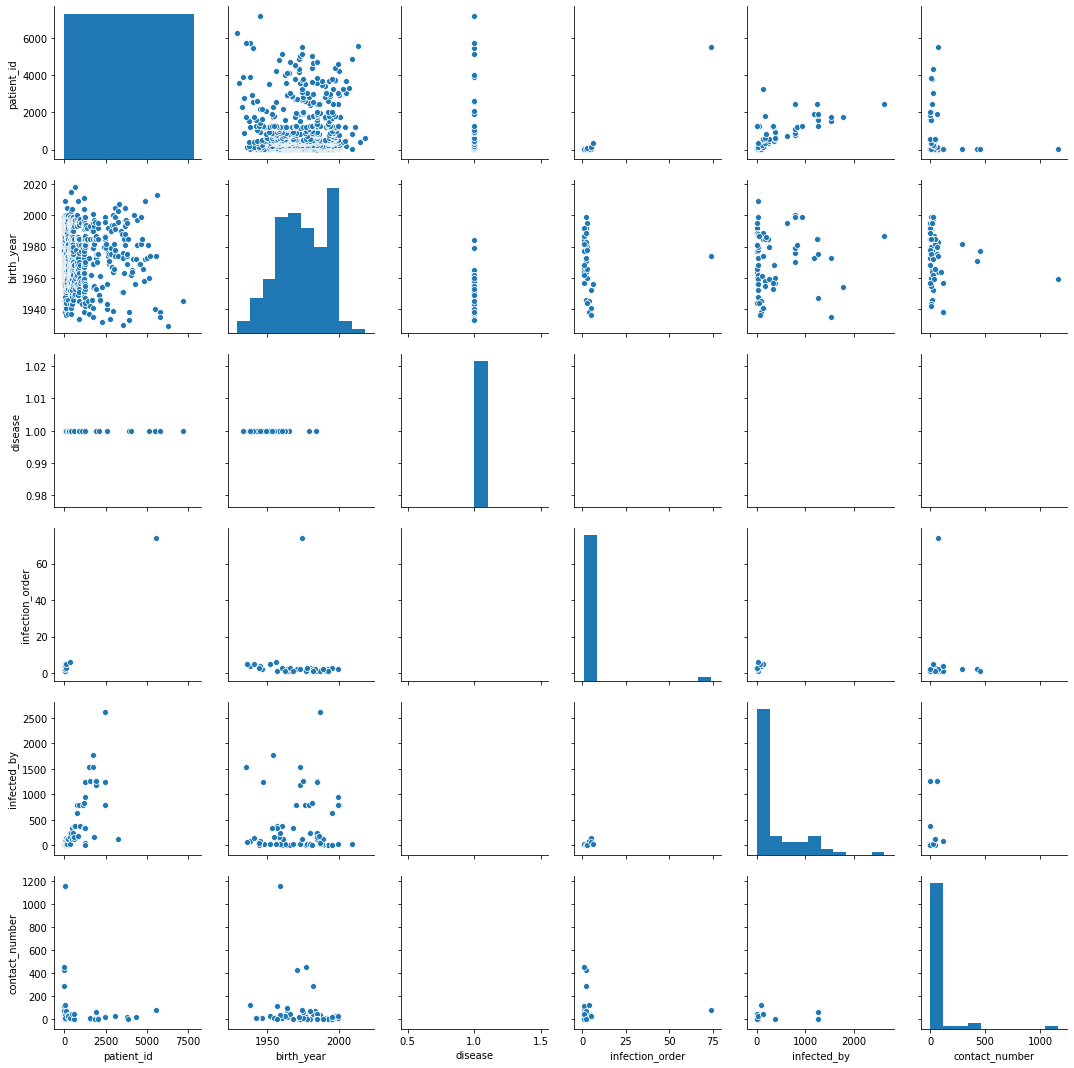

In [10]:
sns.pairplot(corona_data)

In [11]:
data = corona_data.drop(['disease','group','contact_number','confirmed_date','released_date','deceased_date' ], axis =1)

In [12]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,infected_by,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,1.0,NaN,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,1.0,NaN,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated


In [13]:

data.describe(include = 'all')

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,infected_by,state
count,7869.000000,679,666.000000,7869,437,154,36.000000,70.000000,7869
unique,NaN,2,NaN,3,14,14,NaN,NaN,3
top,NaN,female,NaN,Korea,capital area,contact with patient,NaN,NaN,isolated
freq,NaN,393,NaN,7860,191,76,NaN,NaN,7777
mean,3935.000000,NaN,1974.271772,NaN,NaN,NaN,4.277778,379.000000,NaN
std,2271.728967,NaN,17.423250,NaN,NaN,NaN,12.032364,540.247528,NaN
min,1.000000,NaN,1929.000000,NaN,NaN,NaN,1.000000,3.000000,NaN
25%,1968.000000,NaN,1962.000000,NaN,NaN,NaN,1.000000,29.250000,NaN
50%,3935.000000,NaN,1974.000000,NaN,NaN,NaN,2.000000,126.000000,NaN
75%,5902.000000,NaN,1990.000000,NaN,NaN,NaN,3.000000,563.250000,NaN


In [14]:
data['sex'].notnull().value_counts()

False    7190
True      679
Name: sex, dtype: int64

In [15]:
#data['sex'].dropna(axis=0, inplace = True)

In [16]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,infected_by,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,1.0,NaN,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,1.0,NaN,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated


In [17]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,infected_by,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,1.0,NaN,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,1.0,NaN,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated


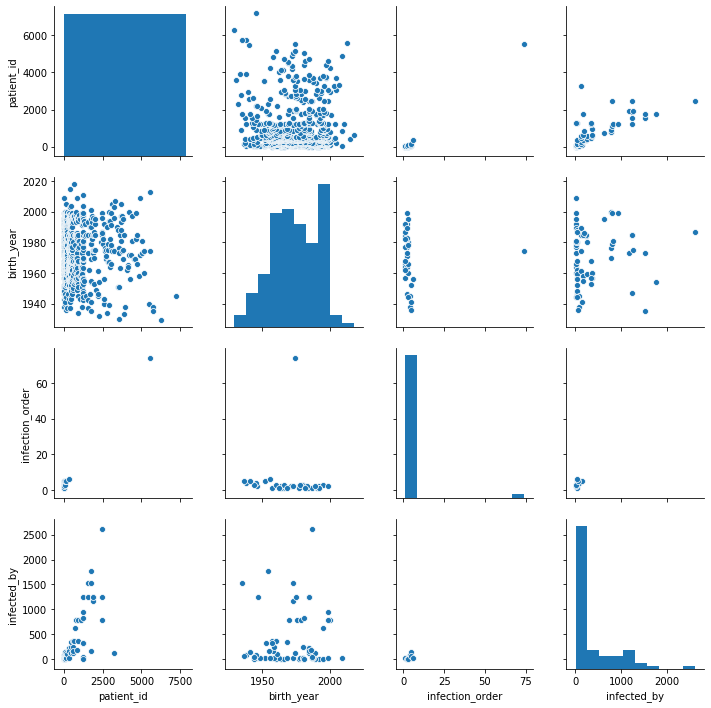

In [18]:
sns.pairplot(data)

In [19]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,infected_by,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,1.0,NaN,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,1.0,NaN,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,1.0,NaN,released
...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,isolated


In [20]:
data.drop(["infected_by"], axis=1, inplace =True)

In [21]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,1.0,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,1.0,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,1.0,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,1.0,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,1.0,released
...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,isolated


In [22]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,1.0,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,1.0,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,1.0,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,1.0,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,1.0,released
...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,isolated


In [23]:
data['infection_order'].fillna(data['infection_order'].mean(), inplace =True)

In [24]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,1.000000,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,1.000000,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,1.000000,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,1.000000,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,1.000000,released
...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,4.277778,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,4.277778,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,4.277778,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,4.277778,isolated


In [25]:
data['infection_order'].isnull().value_counts()

False    7869
Name: infection_order, dtype: int64

In [26]:
data['birth_year'].fillna(data['birth_year'].mean(), inplace =True)

In [27]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,female,1984.000000,China,filtered at airport,visit to Wuhan,1.000000,released
1,2,male,1964.000000,Korea,filtered at airport,visit to Wuhan,1.000000,released
2,3,male,1966.000000,Korea,capital area,visit to Wuhan,1.000000,released
3,4,male,1964.000000,Korea,capital area,visit to Wuhan,1.000000,released
4,5,male,1987.000000,Korea,capital area,visit to Wuhan,1.000000,released
...,...,...,...,...,...,...,...,...
7864,7865,NaN,1974.271772,Korea,NaN,NaN,4.277778,isolated
7865,7866,NaN,1974.271772,Korea,NaN,NaN,4.277778,isolated
7866,7867,NaN,1974.271772,Korea,NaN,NaN,4.277778,isolated
7867,7868,NaN,1974.271772,Korea,NaN,NaN,4.277778,isolated


In [28]:
data['birth_year'] = data['birth_year'].astype('int')

In [29]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,female,1984,China,filtered at airport,visit to Wuhan,1.000000,released
1,2,male,1964,Korea,filtered at airport,visit to Wuhan,1.000000,released
2,3,male,1966,Korea,capital area,visit to Wuhan,1.000000,released
3,4,male,1964,Korea,capital area,visit to Wuhan,1.000000,released
4,5,male,1987,Korea,capital area,visit to Wuhan,1.000000,released
...,...,...,...,...,...,...,...,...
7864,7865,NaN,1974,Korea,NaN,NaN,4.277778,isolated
7865,7866,NaN,1974,Korea,NaN,NaN,4.277778,isolated
7866,7867,NaN,1974,Korea,NaN,NaN,4.277778,isolated
7867,7868,NaN,1974,Korea,NaN,NaN,4.277778,isolated


In [30]:
data['infection_reason'].fillna(data['infection_reason'].mode(), inplace =True)

In [31]:
data['infection_order']=data['infection_order'].astype('int')

In [32]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,female,1984,China,filtered at airport,visit to Wuhan,1,released
1,2,male,1964,Korea,filtered at airport,visit to Wuhan,1,released
2,3,male,1966,Korea,capital area,visit to Wuhan,1,released
3,4,male,1964,Korea,capital area,visit to Wuhan,1,released
4,5,male,1987,Korea,capital area,visit to Wuhan,1,released
...,...,...,...,...,...,...,...,...
7864,7865,NaN,1974,Korea,NaN,NaN,4,isolated
7865,7866,NaN,1974,Korea,NaN,NaN,4,isolated
7866,7867,NaN,1974,Korea,NaN,NaN,4,isolated
7867,7868,NaN,1974,Korea,NaN,NaN,4,isolated


In [33]:
data['region'].isnull().value_counts()

True     7432
False     437
Name: region, dtype: int64

In [34]:
data['region'].values

array(['filtered at airport', 'filtered at airport', 'capital area', ...,
       nan, nan, nan], dtype=object)

In [35]:
dummy_region = pd.get_dummies(data['region'])

In [36]:
data['region'].value_counts()

capital area           191
Gyeongsangbuk-do       140
Daegu                   57
Daejeon                 13
Gwangju                 11
Gangwon-do               5
filtered at airport      4
Jeju-do                  4
Jeollabuk-do             3
Jeollanam-do             3
Chungcheongbuk-do        2
Ulsan                    2
Busan                    1
Chungcheongnam-do        1
Name: region, dtype: int64

In [37]:

data['region'].fillna('capital area', inplace = True)

In [38]:

data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,female,1984,China,filtered at airport,visit to Wuhan,1,released
1,2,male,1964,Korea,filtered at airport,visit to Wuhan,1,released
2,3,male,1966,Korea,capital area,visit to Wuhan,1,released
3,4,male,1964,Korea,capital area,visit to Wuhan,1,released
4,5,male,1987,Korea,capital area,visit to Wuhan,1,released
...,...,...,...,...,...,...,...,...
7864,7865,NaN,1974,Korea,capital area,NaN,4,isolated
7865,7866,NaN,1974,Korea,capital area,NaN,4,isolated
7866,7867,NaN,1974,Korea,capital area,NaN,4,isolated
7867,7868,NaN,1974,Korea,capital area,NaN,4,isolated


In [39]:
data['region'].value_counts()

capital area           7623
Gyeongsangbuk-do        140
Daegu                    57
Daejeon                  13
Gwangju                  11
Gangwon-do                5
filtered at airport       4
Jeju-do                   4
Jeollabuk-do              3
Jeollanam-do              3
Chungcheongbuk-do         2
Ulsan                     2
Busan                     1
Chungcheongnam-do         1
Name: region, dtype: int64

In [40]:
data['sex'].value_counts()

female    393
male      286
Name: sex, dtype: int64

In [41]:
data['sex'].fillna(0, inplace = True)

In [42]:
data['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
7864         0
7865         0
7866         0
7867         0
7868         0
Name: sex, Length: 7869, dtype: object

In [43]:
sexe = {'sex': {'male':1, 'female':2}}

In [44]:
data.replace(sexe, inplace = True)

In [45]:
data.count()

patient_id          7869
sex                 7869
birth_year          7869
country             7869
region              7869
infection_reason     154
infection_order     7869
state               7869
dtype: int64

In [46]:
data["infection_reason"].value_counts()

contact with patient                 76
visit to Daegu                       50
visit to Wuhan                        8
pilgrimage to Israel                  6
contact with patient in Singapore     2
visit to China                        2
residence in Wuhan                    2
visit to Thailand                     2
contact with patient in Daegu         1
visit to ooo                          1
contact with patient in Japan         1
visit to Japan                        1
visit to Vietnam                      1
visit to Italy                        1
Name: infection_reason, dtype: int64

In [47]:
data['infection_reason'].fillna('visite to China', inplace =True)

In [48]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,2,1984,China,filtered at airport,visit to Wuhan,1,released
1,2,1,1964,Korea,filtered at airport,visit to Wuhan,1,released
2,3,1,1966,Korea,capital area,visit to Wuhan,1,released
3,4,1,1964,Korea,capital area,visit to Wuhan,1,released
4,5,1,1987,Korea,capital area,visit to Wuhan,1,released
...,...,...,...,...,...,...,...,...
7864,7865,0,1974,Korea,capital area,visite to China,4,isolated
7865,7866,0,1974,Korea,capital area,visite to China,4,isolated
7866,7867,0,1974,Korea,capital area,visite to China,4,isolated
7867,7868,0,1974,Korea,capital area,visite to China,4,isolated


In [49]:
data.isnull()

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7864,False,False,False,False,False,False,False,False
7865,False,False,False,False,False,False,False,False
7866,False,False,False,False,False,False,False,False
7867,False,False,False,False,False,False,False,False


In [50]:
data.describe(include="all")

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
count,7869.000000,7869.000000,7869.000000,7869,7869,7869,7869.000000,7869
unique,NaN,NaN,NaN,3,14,15,NaN,3
top,NaN,NaN,NaN,Korea,capital area,visite to China,NaN,isolated
freq,NaN,NaN,NaN,7860,7623,7715,NaN,7777
mean,3935.000000,0.136231,1974.023002,NaN,NaN,NaN,4.001271,NaN
std,2271.728967,0.466460,5.065896,NaN,NaN,NaN,0.802733,NaN
min,1.000000,0.000000,1929.000000,NaN,NaN,NaN,1.000000,NaN
25%,1968.000000,0.000000,1974.000000,NaN,NaN,NaN,4.000000,NaN
50%,3935.000000,0.000000,1974.000000,NaN,NaN,NaN,4.000000,NaN
75%,5902.000000,0.000000,1974.000000,NaN,NaN,NaN,4.000000,NaN


In [51]:
data.dtypes

patient_id           int64
sex                  int64
birth_year           int64
country             object
region              object
infection_reason    object
infection_order      int64
state               object
dtype: object

In [52]:
data

,patient_id,sex,birth_year,country,region,infection_reason,infection_order,state
0,1,2,1984,China,filtered at airport,visit to Wuhan,1,released
1,2,1,1964,Korea,filtered at airport,visit to Wuhan,1,released
2,3,1,1966,Korea,capital area,visit to Wuhan,1,released
3,4,1,1964,Korea,capital area,visit to Wuhan,1,released
4,5,1,1987,Korea,capital area,visit to Wuhan,1,released
...,...,...,...,...,...,...,...,...
7864,7865,0,1974,Korea,capital area,visite to China,4,isolated
7865,7866,0,1974,Korea,capital area,visite to China,4,isolated
7866,7867,0,1974,Korea,capital area,visite to China,4,isolated
7867,7868,0,1974,Korea,capital area,visite to China,4,isolated


In [53]:
 data['state'].value_counts()

isolated    7777
released      56
deceased      36
Name: state, dtype: int64

In [54]:
data['country'].value_counts()

Korea       7860
China          8
Mongolia       1
Name: country, dtype: int64

In [55]:
data['birth_year'] = 2020 - data['birth_year']

In [56]:
data['birth_year']

0       36
1       56
2       54
3       56
4       33
        ..
7864    46
7865    46
7866    46
7867    46
7868    46
Name: birth_year, Length: 7869, dtype: int64

In [57]:
data.rename(columns = {'birth_year':'age'}, inplace = True
           )

In [58]:
data

,patient_id,sex,age,country,region,infection_reason,infection_order,state
0,1,2,36,China,filtered at airport,visit to Wuhan,1,released
1,2,1,56,Korea,filtered at airport,visit to Wuhan,1,released
2,3,1,54,Korea,capital area,visit to Wuhan,1,released
3,4,1,56,Korea,capital area,visit to Wuhan,1,released
4,5,1,33,Korea,capital area,visit to Wuhan,1,released
...,...,...,...,...,...,...,...,...
7864,7865,0,46,Korea,capital area,visite to China,4,isolated
7865,7866,0,46,Korea,capital area,visite to China,4,isolated
7866,7867,0,46,Korea,capital area,visite to China,4,isolated
7867,7868,0,46,Korea,capital area,visite to China,4,isolated


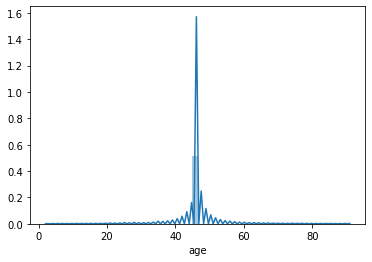

In [59]:
sns.distplot(data['age'])

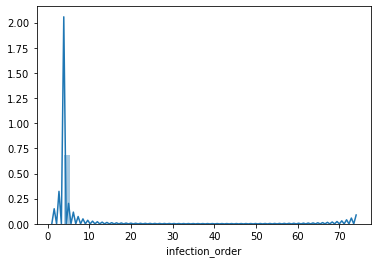

In [60]:
sns.distplot(data['infection_order'])

In [61]:
data

,patient_id,sex,age,country,region,infection_reason,infection_order,state
0,1,2,36,China,filtered at airport,visit to Wuhan,1,released
1,2,1,56,Korea,filtered at airport,visit to Wuhan,1,released
2,3,1,54,Korea,capital area,visit to Wuhan,1,released
3,4,1,56,Korea,capital area,visit to Wuhan,1,released
4,5,1,33,Korea,capital area,visit to Wuhan,1,released
...,...,...,...,...,...,...,...,...
7864,7865,0,46,Korea,capital area,visite to China,4,isolated
7865,7866,0,46,Korea,capital area,visite to China,4,isolated
7866,7867,0,46,Korea,capital area,visite to China,4,isolated
7867,7868,0,46,Korea,capital area,visite to China,4,isolated


In [62]:
data[data['sex']==2] 
    


,patient_id,sex,age,country,region,infection_reason,infection_order,state
0,1,2,36,China,filtered at airport,visit to Wuhan,1,released
7,8,2,63,Korea,Jeollabuk-do,visit to Wuhan,1,released
8,9,2,28,Korea,capital area,contact with patient,2,released
9,10,2,54,Korea,capital area,contact with patient,3,released
13,14,2,40,China,capital area,contact with patient,3,released
...,...,...,...,...,...,...,...,...
4891,4892,2,11,Korea,capital area,visite to China,4,isolated
5025,5026,2,47,Korea,capital area,visite to China,4,isolated
5172,5173,2,46,Korea,capital area,visite to China,4,isolated
5767,5768,2,85,Korea,Gyeongsangbuk-do,visite to China,4,deceased


In [63]:
women=data[data['sex']==1]

In [64]:
women.count()

patient_id          286
sex                 286
age                 286
country             286
region              286
infection_reason    286
infection_order     286
state               286
dtype: int64

In [65]:
data['state'].value_counts()

isolated    7777
released      56
deceased      36
Name: state, dtype: int64

In [66]:
state = {'state':{'isolated': 1 , 'released': 2 , 'deceased': 3}}
data.replace(state, inplace = True)

In [67]:
data

,patient_id,sex,age,country,region,infection_reason,infection_order,state
0,1,2,36,China,filtered at airport,visit to Wuhan,1,2
1,2,1,56,Korea,filtered at airport,visit to Wuhan,1,2
2,3,1,54,Korea,capital area,visit to Wuhan,1,2
3,4,1,56,Korea,capital area,visit to Wuhan,1,2
4,5,1,33,Korea,capital area,visit to Wuhan,1,2
...,...,...,...,...,...,...,...,...
7864,7865,0,46,Korea,capital area,visite to China,4,1
7865,7866,0,46,Korea,capital area,visite to China,4,1
7866,7867,0,46,Korea,capital area,visite to China,4,1
7867,7868,0,46,Korea,capital area,visite to China,4,1


In [68]:
X = data.iloc[:,1]
Y = data.iloc[:,-1]

In [ ]:
sns.barplot(X,Y, hue='sex')